This site uses data downloaded from the ILAMB CMIP6 site to figure out the types of bias that exist in the Eastern Amazon across the existing CMIP6 land model archive

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import netCDF4 as nc4


In [2]:
models = ['Benchmark','CESM2','SAM0-UNICON','IPSL-CM6A-LR','BCC-CSM2-MR','EC-Earth3-Veg']
root ='/glade/u/home/rfisher/ILAMB_output/'
sz=6
models = ['Benchmark','CESM2','SAM0-UNICON','IPSL-CM6A-LR','BCC-ESM1','EC-Earth3-Veg','CanESM5']
mods=7

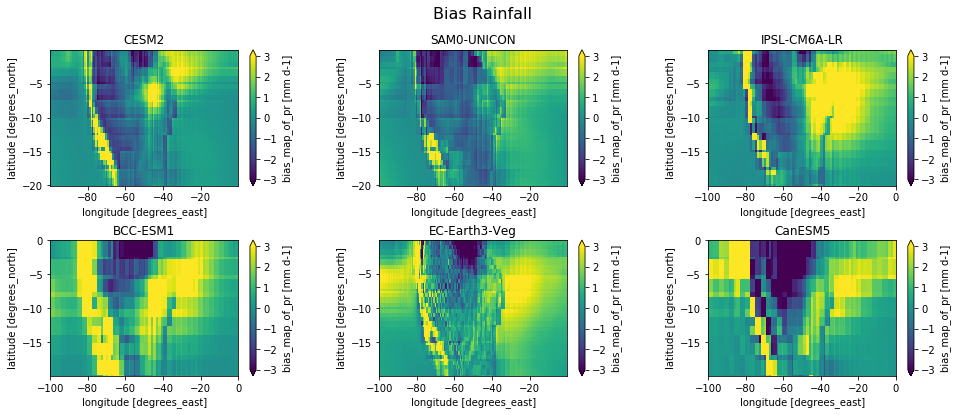

In [3]:
plt.rcParams['figure.figsize'] = [16, 6]
fig = plt.figure()
plt.rcParams['figure.figsize'] = [16, 6]
fig.suptitle('Bias Rainfall', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
    dat = 'GPCP2'
    var = 'rainfall'
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    rainfall = xr.open_dataset(filename,group='MeanState')
    rainfall.bias_map_of_pr.sel(lat_=slice(-20, 0),lon_=slice(-100, 0)).plot(vmin=-3, vmax=3)
    plt.title(models[i])    

/glade/u/home/rfisher/ILAMB_output/biomass/GEOCARBON_CESM2.nc
/glade/u/home/rfisher/ILAMB_output/biomass/GEOCARBON_SAM0-UNICON.nc
/glade/u/home/rfisher/ILAMB_output/biomass/GEOCARBON_IPSL-CM6A-LR.nc
/glade/u/home/rfisher/ILAMB_output/biomass/GEOCARBON_BCC-ESM1.nc
/glade/u/home/rfisher/ILAMB_output/biomass/GEOCARBON_EC-Earth3-Veg.nc
/glade/u/home/rfisher/ILAMB_output/biomass/GEOCARBON_CanESM5.nc


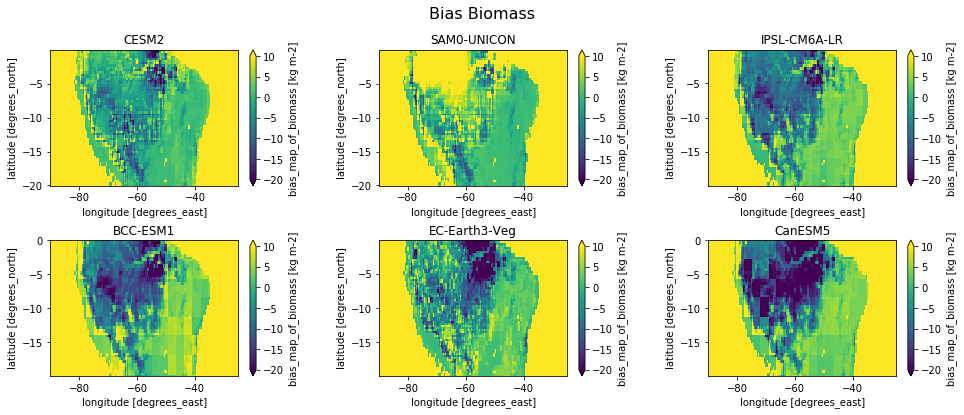

In [4]:
fig = plt.figure()
fig.suptitle('Bias Biomass', fontsize=16)
plt.rcParams['figure.figsize'] = [16, 6]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
    dat = 'GEOCARBON'
    var = 'biomass'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    print(filename)
    biomass = xr.open_dataset(filename,group='MeanState')
    biomass=biomass.bias_map_of_biomass.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))
    biomass.plot(vmin=-20, vmax=10)
    plt.title(models[i])

/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_CESM2.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_SAM0-UNICON.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_IPSL-CM6A-LR.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_BCC-ESM1.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_EC-Earth3-Veg.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_CanESM5.nc


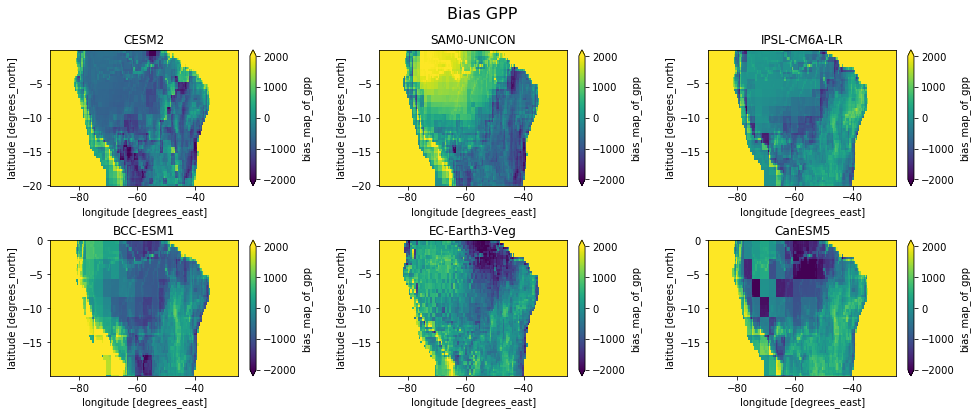

In [5]:
fig = plt.figure()
fig.suptitle('Bias GPP', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
    dat = 'GBAF'
    var = 'gpp'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    gpp = xr.open_dataset(filename,group='MeanState')
    print(filename)
    gpp = xr.open_dataset(filename,group='MeanState')
    gpp=gpp.bias_map_of_gpp.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))
    gpp=gpp*365
    gpp.plot(vmin=-2000, vmax=2000)
    plt.title(models[i])

/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_CESM2.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_SAM0-UNICON.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_IPSL-CM6A-LR.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_BCC-ESM1.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_EC-Earth3-Veg.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_CanESM5.nc


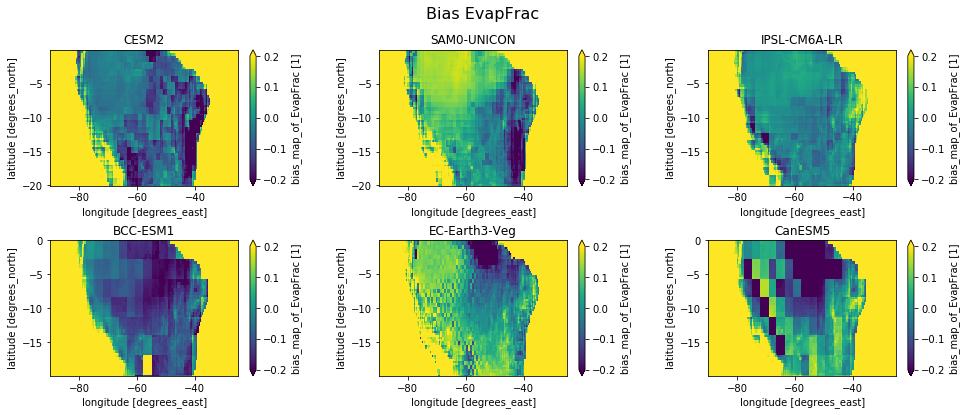

In [6]:
fig = plt.figure()
fig.suptitle('Bias EvapFrac', fontsize=16)
plt.rcParams['figure.figsize'] = [16, 6]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
    dat = 'GBAF'
    var = 'evapfrac'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    evapfrac = xr.open_dataset(filename,group='MeanState')
    print(filename)
    evapfrac = xr.open_dataset(filename,group='MeanState')
    evapfrac=evapfrac.bias_map_of_EvapFrac.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))
    evapfrac.plot(vmin=-0.2, vmax=0.2)
    plt.title(models[i])

Text(0.5, 1.0, 'rain vs evapfracobs')

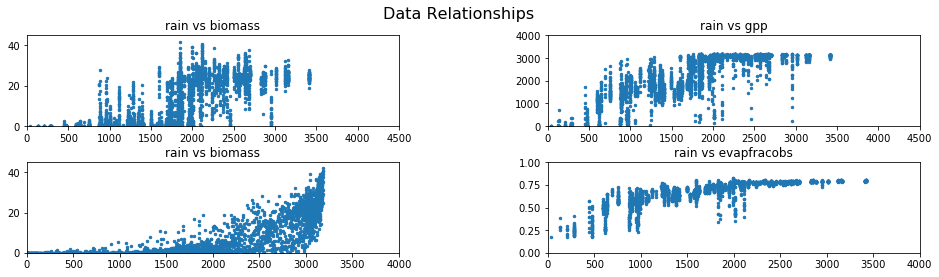

In [7]:
plt.rcParams['figure.figsize'] = [16, 4]
dat = 'GEOCARBON'
var = 'biomass' 
filename =root + var + '/' + dat + '_' + models[0] + '.nc'
biomassobs = xr.open_dataset(filename,group='MeanState')
biomassobs = biomassobs.timeint_of_biomass.sel(lat=slice(-20, 0),lon=slice(-100, 0))

dat = 'GPCP2'
var = 'rainfall'
filename =root + var + '/' + dat + '_' + models[0] + '.nc'
rainfallobs = xr.open_dataset(filename,group='MeanState')
rainobs = rainfallobs.timeint_of_pr.sel(lat=slice(-20, 0),lon=slice(-100, 0))
rainobs=rainobs*365

dat = 'GBAF'
var = 'gpp'
filename =root + var + '/' + dat + '_' + models[0] + '.nc'
gppobs = xr.open_dataset(filename,group='MeanState')
gppobs = gppobs.timeint_of_gpp.sel(lat=slice(-20, 0),lon=slice(-100, 0))
gppobs=gppobs*365

dat = 'GBAF'
var = 'evapfrac'
filename =root + var + '/' + dat + '_' + models[0] + '.nc'
evapfracobs = xr.open_dataset(filename,group='MeanState')
evapfracobs = evapfracobs.timeint_of_EvapFrac.sel(lat=slice(-20, 0),lon=slice(-100, 0))

fig = plt.figure()
fig.suptitle('Data Relationships', fontsize=16)
plt.rcParams['figure.figsize'] = [16, 6]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
  
ax = fig.add_subplot(2, 2, 1)  
plt.scatter(rainobs,biomassobs,s=sz)
plt.ylim(0,45)
plt.xlim(0,4500)
plt.title('rain vs biomass')

ax = fig.add_subplot(2, 2, 2)  
plt.scatter(rainobs,gppobs,s=sz)
plt.ylim(0,4000)
plt.xlim(0,4500)
plt.title('rain vs gpp')

ax = fig.add_subplot(2, 2, 3) 
plt.scatter(gppobs,biomassobs,s=sz)
plt.ylim(0,45)
plt.xlim(0,4000)
plt.title('rain vs biomass')

ax = fig.add_subplot(2, 2, 4) 
plt.scatter(rainobs,evapfracobs,s=sz)
plt.ylim(0,1)
plt.xlim(0,4000)
plt.title('rain vs evapfracobs')

Load biomass data

/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_CESM2.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_SAM0-UNICON.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_IPSL-CM6A-LR.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_BCC-ESM1.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_EC-Earth3-Veg.nc
/glade/u/home/rfisher/ILAMB_output/evapfrac/GBAF_CanESM5.nc


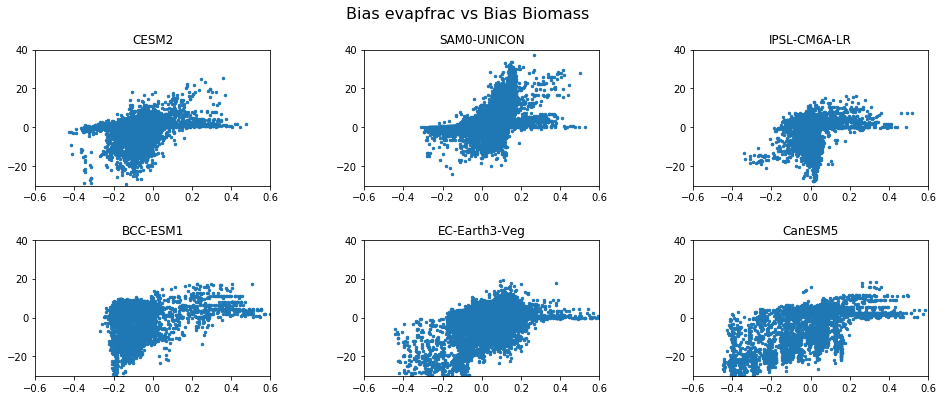

In [8]:
fig = plt.figure()
fig.suptitle('Bias evapfrac vs Bias Biomass', fontsize=16)
plt.rcParams['figure.figsize'] = [16, 8]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
    dat = 'GBAF'
    var = 'evapfrac'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    evapfrac = xr.open_dataset(filename,group='MeanState')
    print(filename)
    evapfrac = xr.open_dataset(filename,group='MeanState')
    evapfrac=evapfrac.bias_map_of_EvapFrac.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))    
    x=evapfrac

    dat = 'GEOCARBON'
    var = 'biomass'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    biomass = xr.open_dataset(filename,group='MeanState')
    biomass=biomass.bias_map_of_biomass.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))
    y=biomass
    
    if x.sizes['lon_'] != y.sizes['lon_']:
      lns=range(0,x.sizes['lon_'])
      y=y.isel(lon_=lns)
    sz=6
    plt.scatter(x,y,s=sz)    
    plt.ylim(-30,40)
    plt.xlim(-0.6,0.6)
    #biomass.plot(vmin=-20, vmax=20)
    plt.title(models[i])

/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_CESM2.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_SAM0-UNICON.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_IPSL-CM6A-LR.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_BCC-ESM1.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_EC-Earth3-Veg.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_CanESM5.nc


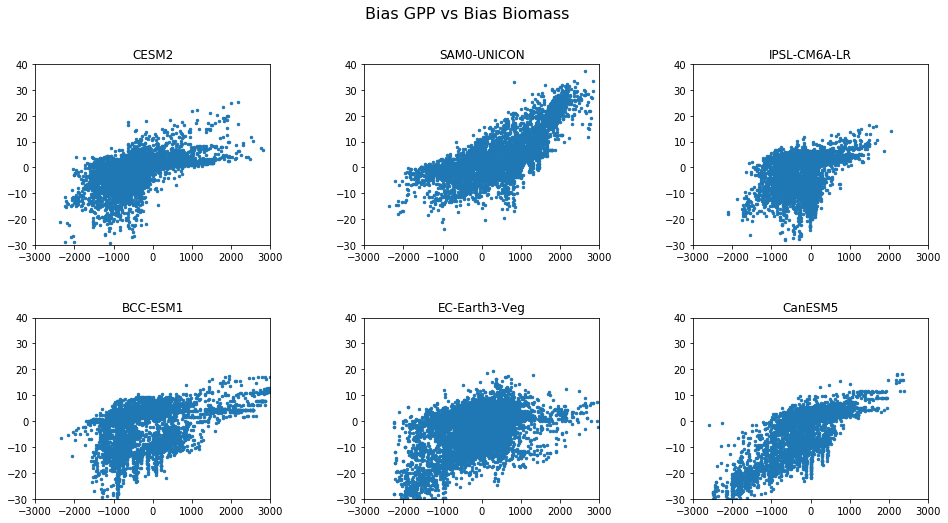

In [9]:
fig = plt.figure()
fig.suptitle('Bias GPP vs Bias Biomass', fontsize=16)
plt.rcParams['figure.figsize'] = [12, 6]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
    dat = 'GBAF'
    var = 'gpp'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    evapfrac = xr.open_dataset(filename,group='MeanState')
    print(filename)
    gpp = xr.open_dataset(filename,group='MeanState')
    gpp=evapfrac.bias_map_of_gpp.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))    
    x=gpp*365

    dat = 'GEOCARBON'
    var = 'biomass'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    biomass = xr.open_dataset(filename,group='MeanState')
    biomass=biomass.bias_map_of_biomass.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))
    y=biomass

    if x.sizes['lon_'] < y.sizes['lon_']:
      lns=range(0,x.sizes['lon_'])
      y=y.isel(lon_=lns)
    if x.sizes['lon_'] > y.sizes['lon_']:
      lns=range(0,y.sizes['lon_'])
      x=x.isel(lon_=lns)           
    if x.sizes['lat_'] < y.sizes['lat_']:
      lns=range(0,x.sizes['lon_'])
      y=y.isel(lon_=lns)
    if x.sizes['lat_'] > y.sizes['lat_']:
      lns=range(0,y.sizes['lat_'])
      x=x.isel(lat_=lns)
    sz=6
    plt.scatter(x,y,s=sz)    
    plt.ylim(-30,40)
    plt.xlim(-3000,3000)
    #biomass.plot(vmin=-20, vmax=20)
    plt.title(models[i])

/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_CESM2.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_SAM0-UNICON.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_IPSL-CM6A-LR.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_BCC-ESM1.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_EC-Earth3-Veg.nc
/glade/u/home/rfisher/ILAMB_output/gpp/GBAF_CanESM5.nc


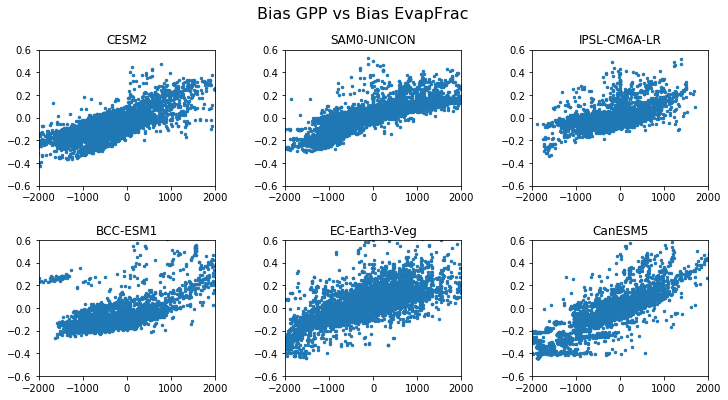

In [10]:
fig = plt.figure()
fig.suptitle('Bias GPP vs Bias EvapFrac', fontsize=16)
plt.rcParams['figure.figsize'] = [12, 6]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
    dat = 'GBAF'
    var = 'gpp'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    gpp = xr.open_dataset(filename,group='MeanState')
    print(filename)
    gpp = xr.open_dataset(filename,group='MeanState')
    gpp=gpp.bias_map_of_gpp.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))    
    x=gpp*365

    dat = 'GBAF'
    var = 'evapfrac'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    evapfrac = xr.open_dataset(filename,group='MeanState')
    evapfrac=evapfrac.bias_map_of_EvapFrac.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))
    y=evapfrac

    if x.sizes['lon_'] < y.sizes['lon_']:
      lns=range(0,x.sizes['lon_'])
      y=y.isel(lon_=lns)
    if x.sizes['lon_'] > y.sizes['lon_']:
      lns=range(0,y.sizes['lon_'])
      x=x.isel(lon_=lns)           
    if x.sizes['lat_'] < y.sizes['lat_']:
      lns=range(0,x.sizes['lon_'])
      y=y.isel(lon_=lns)
    if x.sizes['lat_'] > y.sizes['lat_']:
      lns=range(0,y.sizes['lat_'])
      x=x.isel(lat_=lns)
    sz=6
    plt.scatter(x,y,s=sz)    
    plt.xlim(-2000,2000)
    plt.ylim(-0.6,0.6)
    #biomass.plot(vmin=-20, vmax=20)
    plt.title(models[i])

/glade/u/home/rfisher/ILAMB_output/rainfall/GPCP2_CESM2.nc
/glade/u/home/rfisher/ILAMB_output/rainfall/GPCP2_SAM0-UNICON.nc
/glade/u/home/rfisher/ILAMB_output/rainfall/GPCP2_IPSL-CM6A-LR.nc
/glade/u/home/rfisher/ILAMB_output/rainfall/GPCP2_BCC-ESM1.nc
/glade/u/home/rfisher/ILAMB_output/rainfall/GPCP2_EC-Earth3-Veg.nc
/glade/u/home/rfisher/ILAMB_output/rainfall/GPCP2_CanESM5.nc


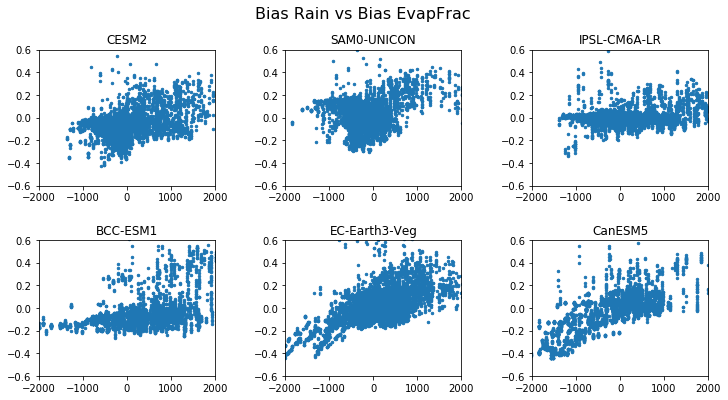

In [11]:
fig = plt.figure()
fig.suptitle('Bias Rain vs Bias EvapFrac', fontsize=16)
plt.rcParams['figure.figsize'] = [12, 6]
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,mods):
    ax = fig.add_subplot(2, 3, i)
  
    dat = 'GPCP2'
    var = 'rainfall'   
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    precip = xr.open_dataset(filename,group='MeanState')
    print(filename)
    precip = xr.open_dataset(filename,group='MeanState')
    precip=precip.bias_map_of_pr.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))    
    x=precip*365

    dat = 'GBAF'
    var = 'evapfrac'    
    filename =root + var + '/' + dat + '_' + models[i] + '.nc'
    evapfrac = xr.open_dataset(filename,group='MeanState')
    evapfrac=evapfrac.bias_map_of_EvapFrac.sel(lat_=slice(-20, 0),lon_=slice(-90, -25))
    y=evapfrac

    if x.sizes['lon_'] < y.sizes['lon_']:
      lns=range(0,x.sizes['lon_'])
      y=y.isel(lon_=lns)
    if x.sizes['lon_'] > y.sizes['lon_']:
      lns=range(0,y.sizes['lon_'])
      x=x.isel(lon_=lns)           
    if x.sizes['lat_'] < y.sizes['lat_']:
      lns=range(0,x.sizes['lon_'])
      y=y.isel(lon_=lns)
    if x.sizes['lat_'] > y.sizes['lat_']:
      lns=range(0,y.sizes['lat_'])
      x=x.isel(lat_=lns)
    sz=6
    plt.scatter(x,y,s=sz)    
    plt.xlim(-2000,2000)
    plt.ylim(-0.6,0.6)
    #biomass.plot(vmin=-20, vmax=20)
    plt.title(models[i])

Load Biomass model output

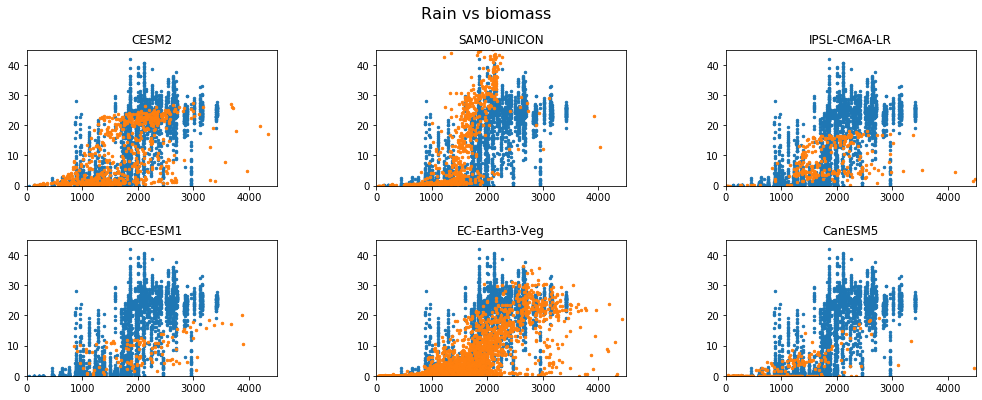

In [12]:
sz=6
plt.rcParams['figure.figsize'] = [17, 6]
clims=range(1,mods)
fig = plt.figure()
fig.suptitle('Rain vs biomass', fontsize=16)

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for c in clims:
   ax = fig.add_subplot(2, 3, c)
   dat = 'GEOCARBON'
   var = 'biomass'    
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   biomass = xr.open_dataset(filename,group='MeanState')
   dat = 'GPCP2'
   var = 'rainfall'
   plt.scatter(rainobs,biomassobs,s=sz)
   plt.title('rain vs biomass')
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   rainfall = xr.open_dataset(filename,group='MeanState')
   x=rainfall.timeint_of_pr.sel(lat=slice(-20, 0),lon=slice(-100, 0))
   y=biomass.timeint_of_biomass.sel(lat=slice(-20, 0),lon=slice(-100, 0))
   if x.sizes['lon'] != y.sizes['lon']:
      lns=range(0,x.sizes['lon'])
      y=y.isel(lon=lns)
   x=x*365
   plt.scatter(x,y,s=sz)
   plt.ylim(0,45)
   plt.xlim(0,4500)
    
   plt.title(models[c])

 
   

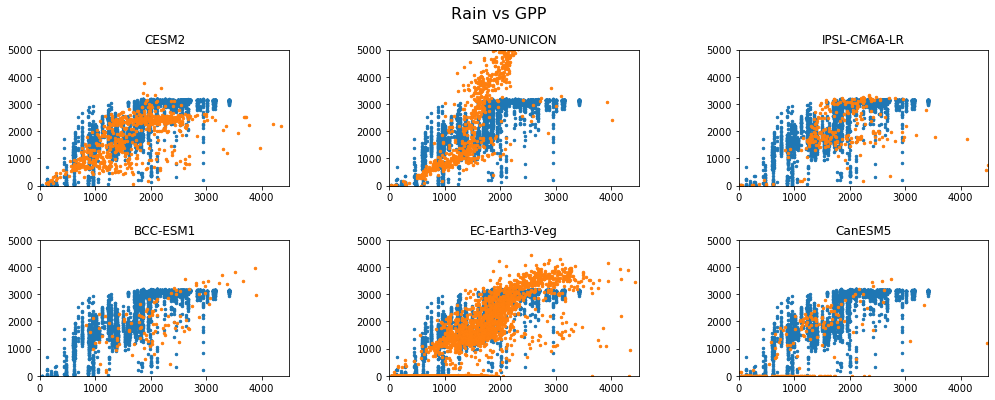

In [13]:
plt.rcParams['figure.figsize'] = [17, 6]
clims=range(1,mods)
fig = plt.figure()
fig.suptitle('Rain vs GPP', fontsize=16)

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for c in clims:
   ax = fig.add_subplot(2, 3, c)
   plt.scatter(rainobs,gppobs,s=sz)
   plt.title('rain vs biomass')
    
   dat = 'GPCP2'
   var = 'rainfall'
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   rainfall = xr.open_dataset(filename,group='MeanState')
   x=rainfall.timeint_of_pr.sel(lat=slice(-20, 0),lon=slice(-100, 0))

   dat = 'GBAF'
   var = 'gpp'    
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   gpp = xr.open_dataset(filename,group='MeanState')
   y=gpp.timeint_of_gpp.sel(lat=slice(-20, 0),lon=slice(-100, 0))
    
   if x.sizes['lon'] != y.sizes['lon']:
      lns=range(0,x.sizes['lon'])
      y=y.isel(lon=lns)
   y=y*365
   x=x*365
   plt.scatter(x,y,s=sz)
   plt.ylim(0,5000)
   plt.xlim(0,4500)
   plt.title('rain vs gpp')
    
   plt.title(models[c])


Load Rainfall data

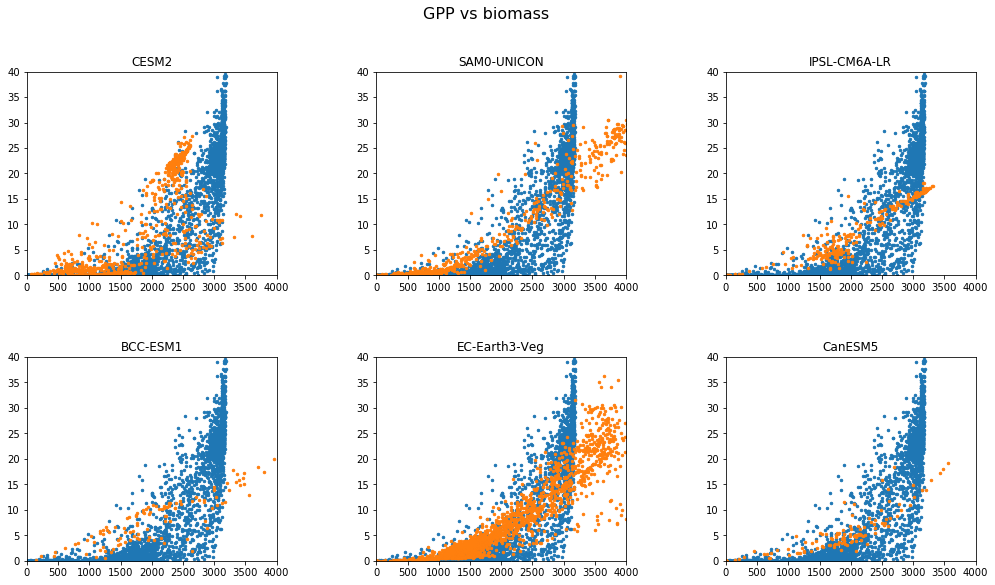

In [14]:

    
plt.rcParams['figure.figsize'] = [17, 9]
clims=range(1,mods)
fig = plt.figure()
fig.suptitle('GPP vs biomass', fontsize=16)

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for c in clims:
   ax = fig.add_subplot(2, 3, c)
   plt.scatter(gppobs,biomassobs,s=sz)
   plt.title('GPP vs biomass')
    
   dat = 'GBAF'
   var = 'gpp'    
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   gpp = xr.open_dataset(filename,group='MeanState')
   x=gpp.timeint_of_gpp.sel(lat=slice(-20, 0),lon=slice(-100, 0))

   dat = 'GEOCARBON'
   var = 'biomass'
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   biomass = xr.open_dataset(filename,group='MeanState')
   y=biomass.timeint_of_biomass.sel(lat=slice(-20, 0),lon=slice(-100, 0))

      
   if x.sizes['lon'] != y.sizes['lon']:
      lns=range(0,x.sizes['lon'])
      y=y.isel(lon=lns)

   x=x*365
   plt.scatter(x,y,s=sz)
   plt.ylim(0,40)
   plt.xlim(0,4000)
    
   plt.title(models[c])
    
    

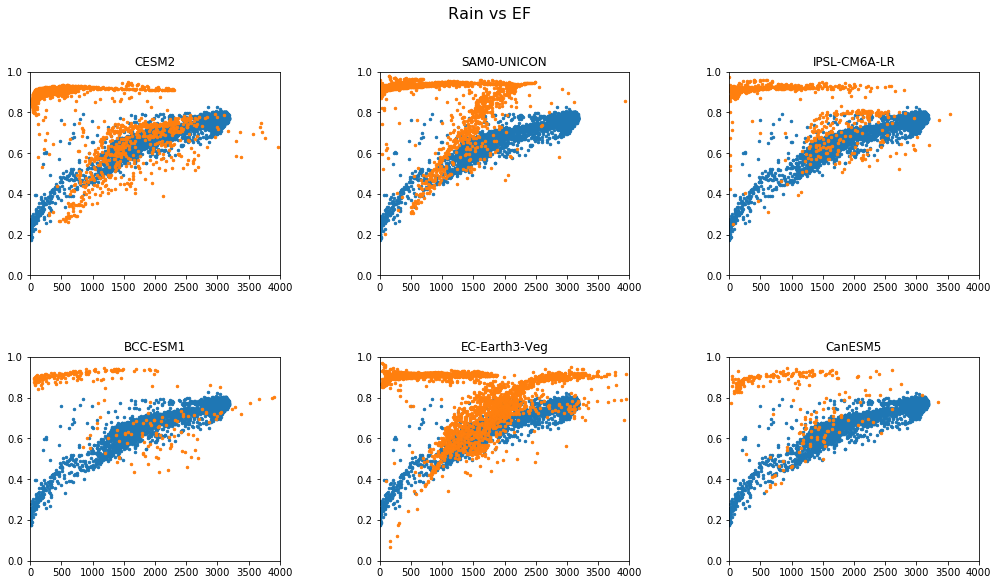

In [15]:
plt.rcParams['figure.figsize'] = [17, 9]
clims=range(1,mods)
fig = plt.figure()
fig.suptitle('Rain vs EF', fontsize=16)

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for c in clims:
   ax = fig.add_subplot(2, 3, c)
   plt.scatter(gppobs,evapfracobs,s=sz)    
   dat = 'GPCP2'
   var = 'rainfall'
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   rainfall = xr.open_dataset(filename,group='MeanState')
   x=rainfall.timeint_of_pr.sel(lat=slice(-20, 0),lon=slice(-100, 0)) 

   dat = 'GBAF'
   var = 'evapfrac'
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   ef = xr.open_dataset(filename,group='MeanState')
   y=ef.timeint_of_EvapFrac.sel(lat=slice(-20, 0),lon=slice(-100, 0))

      
   if x.sizes['lon'] != y.sizes['lon']:
      lns=range(0,x.sizes['lon'])
      y=y.isel(lon=lns)

   x=x*365
   plt.scatter(x,y,s=sz)
   plt.ylim(0,1)
   plt.xlim(0,4000)
    
   plt.title(models[c])
    


IndexError: list index out of range

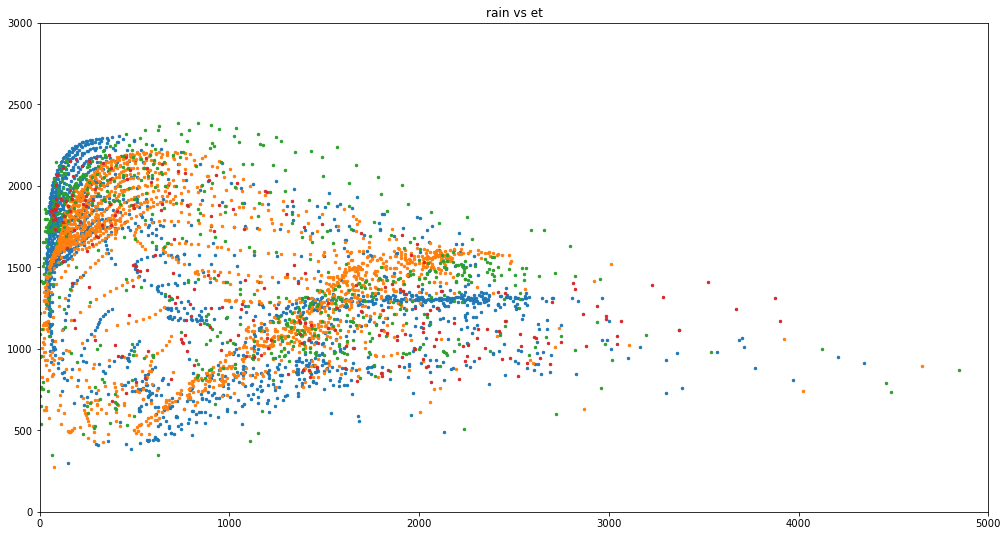

In [16]:
models = ['Benchmark','CESM2','SAM0-UNICON','IPSL-CM6A-LR','BCC-ESM1','EC-Earth3-Veg']
root ='/glade/u/home/rfisher/ILAMB_output/'
sz=6
    
clims=range(1,mods)
for c in clims:
   
  
   dat = 'GPCP2'
   var = 'rainfall'
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   rainfall = xr.open_dataset(filename,group='MeanState')
   x=rainfall.timeint_of_pr.sel(lat=slice(-20, 0),lon=slice(-100, 0)) 

   dat = 'GLEAM'
   var = 'et'    
   filename =root + var + '/' + dat + '_' + models[c] + '.nc'
   et = xr.open_dataset(filename,group='MeanState')
   y=et.timeint_of_et.sel(lat=slice(-20, 0),lon=slice(-100, 0))
 
   if x.sizes['lon'] != y.sizes['lon']:
      lns=range(0,x.sizes['lon'])
      y=y.isel(lon=lns)
   y=y*365
   x=x*365
   plt.scatter(x,y,s=sz)
   plt.ylim(0,3000)
   plt.xlim(0,5000)
   plt.title('rain vs et')